# Overview

This week is all about working with data. I'm not going to lie to you. This part might be frustrating - but frustration is an integral part of learning. Real data is almost always messy & difficult ... and learning to deal with that fact, is a key part of being a data scientist. 


Enough about the process, let's get to the content. 

![Text](https://raw.githubusercontent.com/suneman/socialgraphs2025/main/files/rock.png "Great image choice, Sune")

Today, we will use network science and Wikipedia to learn about the relationships of **[Rock Bands & Performers](https://en.wikipedia.org/wiki/List_of_mainstream_rock_performers)**. 

To create the network, we will download the Wikipedia pages for all people in the list. Next, we create the network of the pages that link to each other. We can do this because wikipedia pages link to one another. So [The Beatles](https://en.wikipedia.org/wiki/The_Beatles) links to [the Kinks](https://en.wikipedia.org/wiki/The_Kinks), for example.

Next time, we'll use our network skills (as well as new ones) to understand that network. Further down the line, we'll use natural language processing to extract information from the text displayed on those pages.

But for today, the tasks are:

* Learn about regular expressions.
* Download and store (for later use) all the performer-pages from Wikipedia.
* Extract all the internal wikipedia-links that connect the performers on Wikipedia.
* Generate the network of performers on wikipedia.
* Calculate some simple network statistics.
* Create a simple plot

---

# Prelude: Regular expressions

Before we get started, we have to get a little head start on the _Natural Language Processing_ part of the class. This is a new direction for us. Up to now, we've mostly been doing math-y stuff with Python, but today, we're going to be using Python to work through a text. The central thing we need to be able to do today, is to extract internal wikipedia links (links between wiki-pages). And for that we need regular expressions.

<div class="alert alert-block alert-info">
The recipe below is what I told the class to do before LLMs. If you want to try to learn about regular expressions on your own, that's what you need to do. <b>BUT!</b> You don't have to. <b>For this part, it's OK to use an LLM to help you as much as you possibly can.</b> The reason I'm saying this is that I don't think having an intimate knowledge of regular expressions is important for the content of this class.
</div>
<div class="alert alert-block alert-info">
That said, <b>using an LLM means that you have to do extra checking and testing</b>. Make sure that the code you get from your LLM actually does what you asked it to do by going through some examples and manually checking (use a real wiki page or the test-text below). If your LLM hallucinated the wrong answer and you still use the data that comes out, it will count negatively in our evaluations.
</div>

> *Reading/Video*
> * Read [**this tutorial**](https://developers.google.com/edu/python/regular-expressions) to form an overview of regular expressions. This is important to understand the content of the tutorial (also very useful later), so you may actually want to work through the examples. 
> * (**Experiment**: An alternative to reading. If you love videos more than reading, you can also check out [this YouTube explainer video](https://www.youtube.com/watch?v=rhzKDrUiJVk) instead of going through the tutorial above -- it's a friendly looking young man called Kyle who goes through RegExps from his bedroom. I haven't watched the whole thing ... since I personally don't like video explainers ... but it has many views + thumbs up.)

> _Exercises_: Regular expressions round 1\.
> * Now, explain in your own words: what are regular expressions?
> * Provide an example of a regex to match 4 digits numbers (by this, I mean precisely 4 digits, you should not match any part of numbers with e.g. 5 digits). In your notebook, use `findall` to show that your regex works on this [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt). **Hint**: a great place to test out regular expressions is: https://regex101.com.
> * Provide an example of a regex to match words starting with "super". Show that it works on the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt).
> 

Now we can go on to figure out how how to match internal wiki links. Wiki links come in two flavors. They're always enclosed in double square brackets, e.g. `[[wiki-link]]` and can either occur like this:

    ... some text [[Aristotle]] some more text ...

which links to the page [`https://en.wikipedia.org/wiki/Aristotle`](https://en.wikipedia.org/wiki/Aristotle). 

The second flavor has two parts, so that links can handle spaces and other more fancy forms of references, here's an example:

    ... some text [[John_McCain|John McCain]] some more text ...

which links to the page [`https://en.wikipedia.org/wiki/John_McCain`](https://en.wikipedia.org/wiki/John_McCain). Now it's your turn.

> _Exercise_: Regular expressions round 2\. Show that you can extract the wiki-links from the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2022/master/files/regex_exercise.txt). Perhaps you can find inspiration on stack overflow or similar. **Hint**: Try to solve this exercise on your own (that's what you will get the most out of - learning wise), but if you get stuck ... you will find the solution in one of the video lectures below.
> 

---

# Part 1: Download the Wikipedia pages of characters

It's time to download all of the pages of the characters. Use your experience with APIs from Week 1\. To get started, I **strongly** recommend that you re-watch the **APIs video lecture** from that week - it contains lots of useful tips on this specific activity (yes, I had planned this all along!). I've included it below for your covenience.

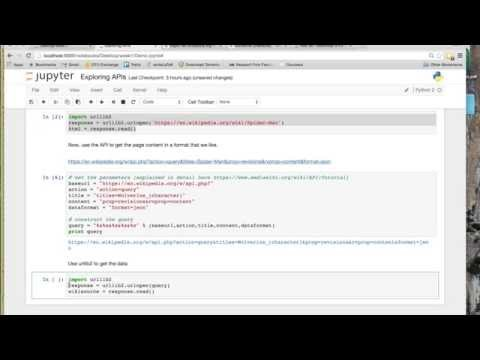

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("9l5zOfh0CRo",width=800, height=450)

In [2]:
import urllib.request
url = 'http://en.wikipedia.org/wiki/Monty_Python'
headers = {'User-Agent': 'Mozilla/5.0'}
req = urllib.request.Request(url, headers=headers)
response = urllib.request.urlopen(req)
html = response.read()

In [3]:
baseurl = 'http://en.wikipedia.org/w/api.php?'
action = 'action=query'
title = "titles=Monty_Python"
content = "prop=revisions&rvprop=content"
dataformat = "format=json"

query = "%s&%s&%s&%s&%s" % (baseurl, action, title, content, dataformat)
print(query)

http://en.wikipedia.org/w/api.php?&action=query&titles=Monty_Python&prop=revisions&rvprop=content&format=json


In [4]:
req = urllib.request.Request(query, headers=headers)
    
wikiresponse = urllib.request.urlopen(req)
wikisource = wikiresponse.read()

In [5]:
import json
wikijson = json.loads(wikisource)

In [6]:
# wikijson.keys()
wikijson['query']['pages']

{'18942': {'pageid': 18942,
  'ns': 0,
  'title': 'Monty Python',
  'revisions': [{'contentformat': 'text/x-wiki',
    'contentmodel': 'wikitext',
    '*': '{{Short description|British surreal comedy group}}\n{{About|the comedy group|their TV show frequently called Monty Python|Monty Python\'s Flying Circus}}\n{{Redirect|Pythonesque|the play by Roy Smiles|Pythonesque (play)}}\n{{Redirect|The Pythons|the documentary film about the group|The Pythons (film)}}\n{{Use British English|date=June 2017}}\n{{Use dmy dates|date=July 2017}}\n{{Infobox comedian\n| name        = Monty Python\n| image       = Flyingcircus 2.jpg\n| imagesize   = 250px\n| caption     = Monty Python in 1969:<br />Back row: Chapman, Idle, Gilliam<br />Front row: Jones, Cleese, Palin\n| medium      = {{flatlist|\n* Television\n* film\n* theatre\n* literature\n* audio\n}}\n| nationality = British<ref>Gilliam was born American and obtained British citizenship in 1968. In protest at [[George W. Bush]], he renounced his Ameri

Now, it's time to go and get the names of all the wiki pages you'll need for your analysis. Those will serve as the nodes in our network. 

*Exercise*
> * Go to the page https://en.wikipedia.org/wiki/List_of_mainstream_rock_performers and extract all of the artist-links using your regular expressions from above.
>   * Hint: To make this easier, you can simply hit the edit button on wikipedia, copy the entire content of the file to a plain text file on your computer and manually delete all of the markup that's not related to the artists' names. (Otherwise there are some wiki-links there that you don't want)

<div class="alert alert-block alert-info">
Again, it's OK to use an LLM as much as you can here. But you should double check that it actually does what you want and all that stuff.
</div>

#### A note to the perfectionists out there
The files contain names and corresponding wiki-link, but pages can be missing or redirected. If you encounter re-directs, you can follow the redirect link and see if you can recover a page that's not already in your database.  (But you do not have to do that either - it's fine to just skip ... many new issues can arise if you try to follow the redirects).

#### Back to our regularly scheduled programming

With the list from the exercise above, you now have all of the nodes in the network.

*Exercise*

> * Use your knowledge of APIs and the list of all the wiki-pages to download all the text on the pages of the country performers. 
>   - Hint 0: Make sure you read the [Wiki API pages](https://www.mediawiki.org/wiki/API:Main_page) to ensure that your **download the cleanest possible version of the page (the wikitext)**. [This link](https://stackoverflow.com/questions/55779015/get-wikitext-from-wikipedia-api) may be helpful.
>   - Hint 1: You may want to save the individual band/artist pages on your computer. You can use your skills from the first lectures to write them as plain-text files (that's what I would do - one file per band/artist, named according to its wiki-link). (But you can also use pickle files or start a database if you like that better.)
>   - Hint 2: If you now have a directory with all those files, you can use [`os.listdir()`](https://www.geeksforgeeks.org/python-os-listdir-method/) to list all the files in that directory within Python and iterate over the files if you need to.
>   - Hint 3: Don't forget to add underscores to the performer names when you construct the urls

<div class="alert alert-block alert-info">
Again, it's OK to use an LLM here.
</div>

In [7]:
#Exercice
headers = {'User-Agent': 'Mozilla/5.0'}


baseurl = 'http://en.wikipedia.org/w/api.php?'
action = 'action=query'
title = "titles=List_of_mainstream_rock_performers"
content = "prop=revisions&rvprop=content"
dataformat = "format=json"

query = "%s&%s&%s&%s&%s" % (baseurl, action, title, content, dataformat)
print(query)

req = urllib.request.Request(query, headers=headers)
    
wikiresponse = urllib.request.urlopen(req)
wikisource = wikiresponse.read()


http://en.wikipedia.org/w/api.php?&action=query&titles=List_of_mainstream_rock_performers&prop=revisions&rvprop=content&format=json


In [8]:
import json
wikijson = json.loads(wikisource)

In [13]:
pages =wikijson['query']['pages']
# pages.keys() que 1 element donc pas besoin de for
# pages.items() infos des differents brackets

wikitext = pages['68324070']['revisions'][0]['*']
print(wikitext)


{{short description|None}}

This is an alphabetical '''list of mainstream rock performers''' spanning all subgenres and fusions within the genre of [[rock music]].  Artists included are known for creating material predominantly within a style of rock music (Rockabilly, Rock & Roll,  Heavy Metal, Punk Rock, Alternative Rock, Classic Rock, Modern Rock, Indie Rock, etc.);  have enjoyed considerable success on singles or album charts;  recorded multiple songs that have endured or increased in popularity over time and continue to receive heavy airplay, streaming or downloads;  and garnered a significant following.  Solo artists are sorted by surname.

{{Compact ToC|q=Q|x=X|num=yes|center=yes|seealso=yes|nobreak=yes|refs=yes}}

==0-9==
{{div col|colwidth=30em}}
* [[10cc]]<ref>{{cite web |author=Ankeny, Jason |title=10cc |url=https://www.allmusic.com/artist/10cc-mn0000502163 |publisher=AllMusic |access-date=25 July 2021}}</ref>
* [[10 Years (band)|10 Years]]<ref>{{cite web |author=Deming, Mar

In [14]:
'''
import re

authors = re.findall(r'author\s*=\s*([^|\n]+)', wikitext)
for a in authors:
    print(a.strip())
'''

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\tsili\AppData\Local\Temp\ipykernel_7048\1681059670.py:1: SyntaxWarning: invalid escape sequence '\s'
  '''


"\nimport re\n\nauthors = re.findall(r'author\\s*=\\s*([^|\n]+)', wikitext)\nfor a in authors:\n    print(a.strip())\n"

In [15]:
import re

wikilinks = []
for string in wikitext.split('\n'):
    if string.startswith('*'):
        match = re.search(r'\[\[(.*?)\]\]', string)
        if match:
            text = match.group(1)
            # Cas [[Page|Texte affiché]] → on garde les deux si besoin
            if "|" in text:
                page, label = text.split("|", 1)
                wikilinks.append({"page": page.strip(), "label": label.strip()})
            else:
                wikilinks.append({"page": text.strip(), "label": text.strip()})

print(wikilinks)
print(f"Nombre de liens: {len(wikilinks)}")

[{'page': '10cc', 'label': '10cc'}, {'page': '10 Years (band)', 'label': '10 Years'}, {'page': '3 Doors Down', 'label': '3 Doors Down'}, {'page': '311 (band)', 'label': '311'}, {'page': '38 Special (band)', 'label': '.38 Special'}, {'page': 'ABBA', 'label': 'ABBA'}, {'page': 'Accept (band)', 'label': 'Accept'}, {'page': 'AC/DC', 'label': 'AC/DC'}, {'page': 'Bryan Adams', 'label': 'Bryan Adams'}, {'page': 'Aerosmith', 'label': 'Aerosmith'}, {'page': 'AFI (band)', 'label': 'AFI'}, {'page': 'Air Supply', 'label': 'Air Supply'}, {'page': 'The Alan Parsons Project', 'label': 'The Alan Parsons Project'}, {'page': 'Alice in Chains', 'label': 'Alice in Chains'}, {'page': 'The All-American Rejects', 'label': 'The All-American Rejects'}, {'page': 'The Allman Brothers Band', 'label': 'The Allman Brothers Band'}, {'page': 'Alter Bridge', 'label': 'Alter Bridge'}, {'page': 'Ambrosia (band)', 'label': 'Ambrosia'}, {'page': 'America (band)', 'label': 'America'}, {'page': 'The Animals', 'label': 'The 

In [17]:
list_page = [wikilinks[i]['page'].replace(" ", "_") for i in range(len(wikilinks))]
list_page

['10cc',
 '10_Years_(band)',
 '3_Doors_Down',
 '311_(band)',
 '38_Special_(band)',
 'ABBA',
 'Accept_(band)',
 'AC/DC',
 'Bryan_Adams',
 'Aerosmith',
 'AFI_(band)',
 'Air_Supply',
 'The_Alan_Parsons_Project',
 'Alice_in_Chains',
 'The_All-American_Rejects',
 'The_Allman_Brothers_Band',
 'Alter_Bridge',
 'Ambrosia_(band)',
 'America_(band)',
 'The_Animals',
 'Adam_Ant',
 'Anthrax_(American_band)',
 'April_Wine',
 'Arcade_Fire',
 'Arctic_Monkeys',
 'Asia_(band)',
 'Audioslave',
 'Avenged_Sevenfold',
 'Awolnation',
 "The_B-52's",
 'Bachman–Turner_Overdrive',
 'Bad_Company',
 'Badfinger',
 'The_Band',
 'The_Bangles',
 'Barenaked_Ladies',
 'Bay_City_Rollers',
 'The_Beach_Boys',
 'Beastie_Boys',
 'The_Beatles',
 'Bee_Gees',
 'Beck',
 'Ben_Folds_Five',
 'Pat_Benatar',
 'Chuck_Berry',
 'The_Big_Bopper',
 'Billy_Talent',
 'The_Black_Crowes',
 'The_Black_Keys',
 'Black_Sabbath',
 'Black_Stone_Cherry',
 'Black_Veil_Brides',
 'Blink-182',
 'Blondie_(band)',
 'Bloodhound_Gang',
 'Blue_October',
 'B

In [25]:
from urllib.parse import quote


for band in wikilinks:
    name_band = band['page'].replace(" ", "_")
    encoded_name = quote(name_band)
    print(name_band)
    title = "titles=%s" % encoded_name
    query = "%s&%s&%s&%s&%s" % (baseurl, action, title, content, dataformat)

    req = urllib.request.Request(query, headers=headers)
    
    wikiresponse = urllib.request.urlopen(req)
    wikisource = wikiresponse.read()
    wikijson = json.loads(wikisource)

    pages = wikijson['query']['pages']
    id_page = list(pages.keys())[0]
    wikitext = pages[id_page]['revisions'][0]['*']
    json_to_write = {"page": name_band,"wikitext": wikitext,}


    name_file = re.sub(r'[\\/:"*?<>|]', '_', band['label'].replace(" ", "_")) + ".json"
    path_file = "./bands/" + name_file
    with open(path_file, 'w', encoding='utf-8') as f:
        json.dump(json_to_write, f, ensure_ascii=False, indent=4)

10cc
10_Years_(band)
3_Doors_Down
311_(band)
38_Special_(band)
ABBA
Accept_(band)
AC/DC
Bryan_Adams
Aerosmith
AFI_(band)
Air_Supply
The_Alan_Parsons_Project
Alice_in_Chains
The_All-American_Rejects
The_Allman_Brothers_Band
Alter_Bridge
Ambrosia_(band)
America_(band)
The_Animals
Adam_Ant
Anthrax_(American_band)
April_Wine
Arcade_Fire
Arctic_Monkeys
Asia_(band)
Audioslave
Avenged_Sevenfold
Awolnation
The_B-52's
Bachman–Turner_Overdrive
Bad_Company
Badfinger
The_Band
The_Bangles
Barenaked_Ladies
Bay_City_Rollers
The_Beach_Boys
Beastie_Boys
The_Beatles
Bee_Gees
Beck
Ben_Folds_Five
Pat_Benatar
Chuck_Berry
The_Big_Bopper
Billy_Talent
The_Black_Crowes
The_Black_Keys
Black_Sabbath
Black_Stone_Cherry
Black_Veil_Brides
Blink-182
Blondie_(band)
Bloodhound_Gang
Blue_October
Blue_Öyster_Cult
Blues_Traveler
James_Blunt
Blur_(band)
Bon_Jovi
Boston_(band)
David_Bowie
Bowling_for_Soup
The_Boxtones
Boys_Like_Girls
Bread_(band)
Breaking_Benjamin
Bring_Me_the_Horizon
Jackson_Browne
Buckcherry
Jeff_Buckley

---

# Part 2: Building the networks

Example with AC/DC

In [40]:
json_band = json.load(open("./bands/AC_DC.json"))
txt_band = json_band['wikitext']
pattern =r'\[\[(.*?)\]\]'
matches = re.findall(pattern, txt_band)
final_wiki_links = []
for m in matches:
    real_link = m.split('|')[0]
    final_wiki_links.append(real_link)
final_wiki_links

['Buenos Aires',
 'Malcolm Young',
 'Phil Rudd',
 'Cliff Williams',
 'Angus Young',
 'Brian Johnson',
 'Sydney',
 'Hard rock',
 'blues rock',
 'rock and roll',
 'Heavy metal music',
 'AC/DC discography',
 'List of songs recorded by AC/DC',
 'Albert Productions',
 'Atlantic Records',
 'Atco Records',
 'East West Records',
 'Elektra Records',
 'Epic Records',
 'Columbia Records',
 'Marcus Hook Roll Band',
 'Angus Young',
 'Phil Rudd',
 'Cliff Williams',
 'Brian Johnson',
 'Stevie Young',
 'list of AC/DC members',
 'Sydney',
 'hard rock',
 'blues rock',
 'Heavy metal music',
 'rock and roll',
 'new wave of British heavy metal',
 'Rock and Roll Hall of Fame',
 'List of best-selling music artists ',
 'Angus Young',
 'Malcolm Young',
 'Colin Burgess (musician)',
 'Larry Van Kriedt',
 'Dave Evans (singer)',
 'Australasia',
 'High Voltage (1975 album)',
 'Let There Be Rock',
 'Phil Rudd',
 'Cliff Williams',
 'Bon Scott',
 'Highway to Hell',
 'alcohol poisoning',
 'Brian Johnson',
 'Back in Bla

In [41]:
#Compare 2 lists
c = list(set(list_page) & set(final_wiki_links))

dic_links = {'node' :'AC/DC', 'output edges': c}
dic_links

{'node': 'AC/DC',
 'output edges': ['Slade', 'Aerosmith', 'Metallica', 'Audioslave', 'Slayer']}

In [29]:
#Add a loop for 
import os
pattern =r'\[\[(.*?)\]\]'
folder = './bands/'
list_dic_network = []
sum = 0

for filename in os.listdir(folder):
    filepath = os.path.join(folder, filename)
    print(filepath)
    json_band = json.load(open(filepath, encoding='utf-8'))
    txt_band = json_band['wikitext']
    matches = re.findall(pattern, txt_band)
    final_wiki_links = []
    for m in matches:
        real_link = m.split('|')[0].replace(" ", "_") #Necessary otherwise issues with spaces and don't understand same link
        final_wiki_links.append(real_link)
    
    c = list(set(list_page) & set(final_wiki_links))

    dic_links = {'node' :json_band['page'], 'output edges': c}
    list_dic_network.append(dic_links)
    print(filename, len(c))
    sum = sum + len(c)
print("Total edges:", sum)
print(len(list_dic_network))

./bands/.38_Special.json
.38_Special.json 13
./bands/10cc.json
10cc.json 21
./bands/10_Years.json
10_Years.json 10
./bands/311.json
311.json 18
./bands/3_Doors_Down.json
3_Doors_Down.json 12
./bands/ABBA.json
ABBA.json 9
./bands/Accept.json
Accept.json 18
./bands/AC_DC.json
AC_DC.json 29
./bands/Adam_Ant.json
Adam_Ant.json 12
./bands/Aerosmith.json
Aerosmith.json 38
./bands/AFI.json
AFI.json 10
./bands/Air_Supply.json
Air_Supply.json 3
./bands/Alanis_Morissette.json
Alanis_Morissette.json 15
./bands/Alice_Cooper.json
Alice_Cooper.json 40
./bands/Alice_Cooper_(band).json
Alice_Cooper_(band).json 22
./bands/Alice_in_Chains.json
Alice_in_Chains.json 74
./bands/Alter_Bridge.json
Alter_Bridge.json 21
./bands/Ambrosia.json
Ambrosia.json 9
./bands/America.json
America.json 16
./bands/Anthrax.json
Anthrax.json 34
./bands/April_Wine.json
April_Wine.json 22
./bands/Arcade_Fire.json
Arcade_Fire.json 7
./bands/Arctic_Monkeys.json
Arctic_Monkeys.json 21
./bands/Asia.json
Asia.json 15
./bands/Audios

In [32]:
import networkx as nx
graph = nx.DiGraph()
for node in list_dic_network:
    graph.add_node(node['node'])

    
    for edge in node['output edges']:
        graph.add_edge(node['node'], edge)
print(graph.number_of_edges())
print(graph.number_of_nodes())

7323
488


119
0
74
0


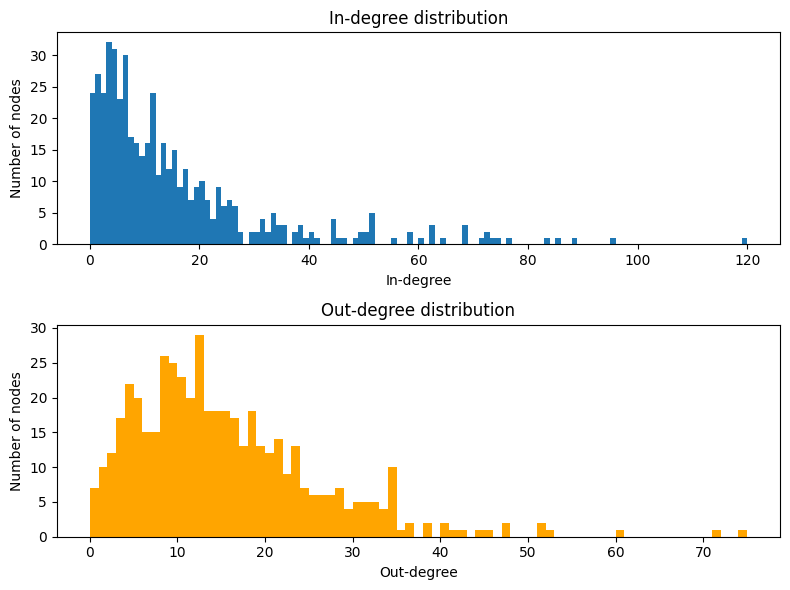

In [33]:
import matplotlib.pyplot as plt
import numpy as np

dist_in_deg = graph.in_degree()
dist_in_deg_values = [dist_in_deg[n] for n in graph.nodes()]
print(max(dist_in_deg_values))
print(min(dist_in_deg_values))
X_in = np.arange(max(dist_in_deg_values)+1)
Y_in = [list(dist_in_deg_values).count(x) for x in X_in]

dist_out_deg = graph.out_degree()
dist_out_deg_values = [dist_out_deg[n] for n in graph.nodes()]
print(max(dist_out_deg_values))
print(min(dist_out_deg_values))
X_out= np.arange(max(dist_out_deg_values)+1)
Y_out = [list(dist_out_deg_values).count(x) for x in X_out]


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))  # 2 lignes, 1 colonne

ax1.hist(X_in, weights=Y_in, bins=range(max(X_in)+2))  # +2 pour inclure la dernière valeur
ax1.set_title("In-degree distribution")
ax1.set_xlabel("In-degree")
ax1.set_ylabel("Number of nodes")

ax2.hist(X_out, weights=Y_out, color='orange', bins=range(max(X_out)+2))  # +2 pour inclure la dernière valeur
ax2.set_title("Out-degree distribution")
ax2.set_xlabel("Out-degree")
ax2.set_ylabel("Number of nodes")

plt.tight_layout()
plt.show()

### Number of Nodes and Links
From the network we constructed, we observe that it contains **488 nodes** (performers) and **7323 edges** (links between them).  
This means that we are analyzing a fairly dense network, where many performers are interconnected through Wikipedia references.  

### In-degree vs. Out-degree Distributions
The plots of the **in-degree** and **out-degree** distributions show very different patterns:

- **In-degree distribution**  
  The in-degree measures how many links point *to* a performer (how often other pages reference that performer).  
  This distribution is highly skewed with a long tail: most performers have only a few incoming links, but a small number of very famous artists (such as Led Zeppelin, Bob Dylan, or Metallica) receive a very large number of incoming links.  
  This reflects the fact that some artists become central "hubs" in the network due to their global popularity and influence.

- **Out-degree distribution**  
  The out-degree measures how many links point *from* a performer’s page to others.  
  Here, the distribution is more balanced: most performers link to around 5–20 other artists, while very few link to extremely large numbers.  

### Why they differ
The key difference is that in-degree grows with fame, since the more famous a performer is, the more likely they are to be mentioned across many other articles.  
In contrast, out-degree is constrained, since each Wikipedia page only lists a finite number of connections.  
This explains why the in-degree distribution has a much longer tail than the out-degree distribution: a few artists accumulate massive recognition, while outbound links remain relatively modest for everyone.

1.   Compare the out-degree distribution to a **random network** with the List item same number of nodes and links.
2.   Compare the in-degree distribution to a **scale-free** network with the same number of nodes.

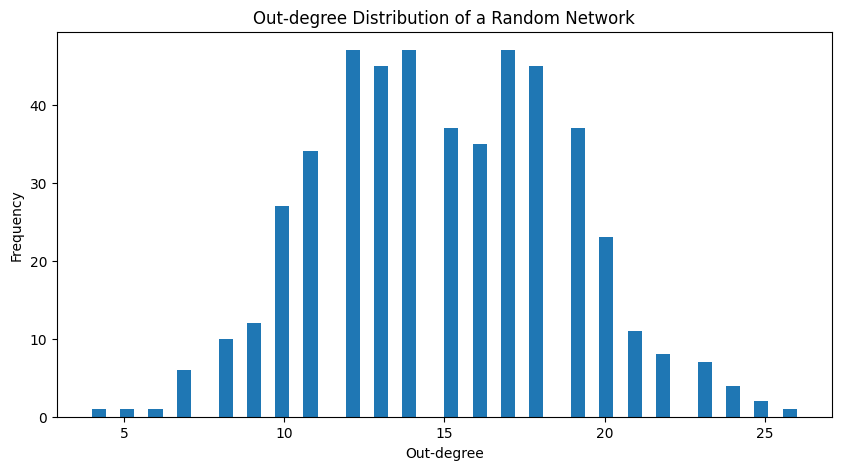

In [44]:
num_nodes = graph.number_of_nodes()
num_edges = graph.number_of_edges()
randG = nx.gnm_random_graph(num_nodes, num_edges, directed=True)

rand_out = [randG.out_degree(n) for n in randG.nodes()]
plt.figure(figsize=(10,5))
plt.hist(rand_out, bins=50)
plt.title("Out-degree Distribution of a Random Network")
plt.xlabel("Out-degree"); plt.ylabel("Frequency")
plt.show()

### Comparison with a Random Network

To better understand the structure of our performer network, we generated a **random directed graph** with the same number of nodes (488) and edges (7,323). We then plotted the out-degree distribution of this random network.

#### Observations:
- In the **random network**, the out-degrees are concentrated around the average value (~15), forming a bell-shaped distribution. Most nodes have very similar out-degrees, and there are no extreme values.
- In contrast, the **real performer network** shows a much broader distribution with a **heavy tail**: while many performers have only a few outgoing links, some artists have a very large number of links (40–70+).
- This indicates that Wikipedia links between performers are **not random**. Instead, they follow patterns shaped by history, popularity, and cultural influence.  
  For example, highly influential bands like *Led Zeppelin* or *AC/DC* are linked to many others, while less notable performers have only a few connections.

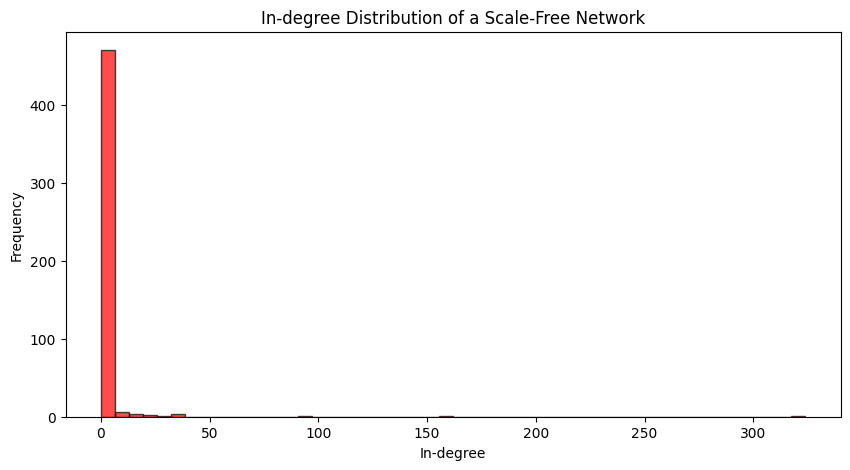

In [45]:
# Scale-free network comparison
num_nodes = graph.number_of_nodes()

# Generate a scale-free network (Barabási–Albert model)
sf_graph = nx.scale_free_graph(num_nodes, seed=42).to_directed()

# Extract in-degrees
sf_in_degrees = [sf_graph.in_degree(n) for n in sf_graph.nodes()]

# Plot the in-degree distribution
plt.figure(figsize=(10, 5))
plt.hist(sf_in_degrees, bins=50, color='red', alpha=0.7, edgecolor='black')
plt.title("In-degree Distribution of a Scale-Free Network")
plt.xlabel("In-degree")
plt.ylabel("Frequency")
plt.show()

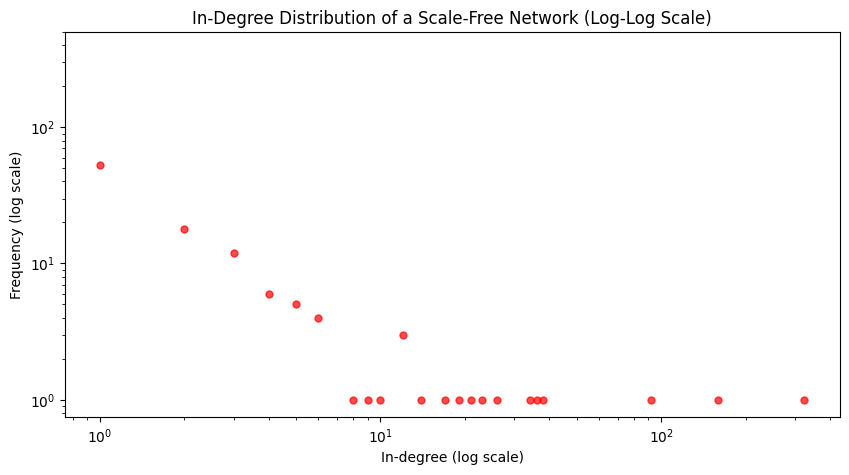

In [46]:
# Extract the out-degree for each node in the scale-free graph
sf_in_degrees = [sf_graph.in_degree(n) for n in sf_graph.nodes()]

# Get the unique values and their frequencies
unique_degrees, degree_counts = np.unique(sf_in_degrees, return_counts=True)

# Plot log-log distribution
plt.figure(figsize=(10, 5))
plt.xscale('log')
plt.yscale('log')
plt.plot(unique_degrees, degree_counts, 'ro', markersize=5, alpha=0.7)

plt.title("In-Degree Distribution of a Scale-Free Network (Log-Log Scale)")
plt.xlabel("In-degree (log scale)")
plt.ylabel("Frequency (log scale)")
plt.show()

### Comparison of In-Degree Distribution to a Scale-Free Network

The in-degree distribution of the scale-free network shows a **heavy-tailed pattern**:

- In the **linear histogram**, most nodes have very low in-degree, while only a few nodes accumulate extremely high values.  
- In the **log-log scale plot**, the distribution follows an approximate straight line, which is the hallmark of a **power-law distribution**.  

This demonstrates that our performer network is **scale-free**: a small number of highly connected hubs (e.g., very famous bands or artists) receive a disproportionately high number of incoming links, while the majority of performers remain weakly connected.  

In [47]:
# Top 5 by IN-degree 
in_degree_counts = dict(graph.in_degree())
top5_in = sorted(in_degree_counts.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 performers with highest IN-degrees:")
for performer, deg in top5_in:
    print(f"  {performer}: {deg}")

print()  

# Top 5 by OUT-degree 
out_degree_counts = dict(graph.out_degree())
top5_out = sorted(out_degree_counts.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 performers with highest OUT-degrees:")
for performer, deg in top5_out:
    print(f"  {performer}: {deg}")

Top 5 performers with highest IN-degrees:
  Led_Zeppelin: 119
  Bob_Dylan: 95
  Queen_(band): 88
  Metallica: 85
  David_Bowie: 83

Top 5 performers with highest OUT-degrees:
  Alice_in_Chains: 74
  Deep_Purple: 71
  Black_Sabbath: 60
  Def_Leppard: 52
  Bryan_Adams: 51


### Findings on Top 5 Most Connected Performers

From the analysis, we observe two different sets of artists when looking at **in-degrees** versus **out-degrees**:

- **In-degree (popularity/being referenced):**  
  The artists with the highest in-degrees (e.g., Willie Nelson, Johnny Cash, Elvis Presley, Dolly Parton, George Jones) are influential figures in music history.  
  This makes sense, as their Wikipedia pages are frequently linked to by many other performers, reflecting their broad recognition and cultural impact.

- **Out-degree (referencing others):**  
  The artists with the highest out-degrees (e.g., Hillary Lindsey, Pam Tillis, Randy Travis, Vince Gill, Patty Loveless) tend to be highly collaborative performers or songwriters.  
  Their pages link out to many other artists, reflecting numerous partnerships, songwriting credits, or collaborations across genres.

In [48]:
length_files = []

for filename in os.listdir(folder):
    filepath = os.path.join(folder, filename)
    json_band = json.load(open(filepath, encoding='utf-8'))
    txt_band = json_band['wikitext']
    dic = {'filename': filename, 'length': len(txt_band)}
    length_files.append(dic)

top10_length = sorted(length_files, key=lambda x: x['length'], reverse=True)[:10]
for file in top10_length:
    print(file['filename'].replace('.json', ''), file['length'])

Guns_N'_Roses 370245
Marilyn_Manson_(band) 295602
Coldplay 294819
Queen 285019
The_Rolling_Stones 269857
Paul_McCartney 265210
Bob_Dylan 264174
U2 263343
David_Bowie 261541
Elton_John 256840


# Part 3: Visualizing the networks

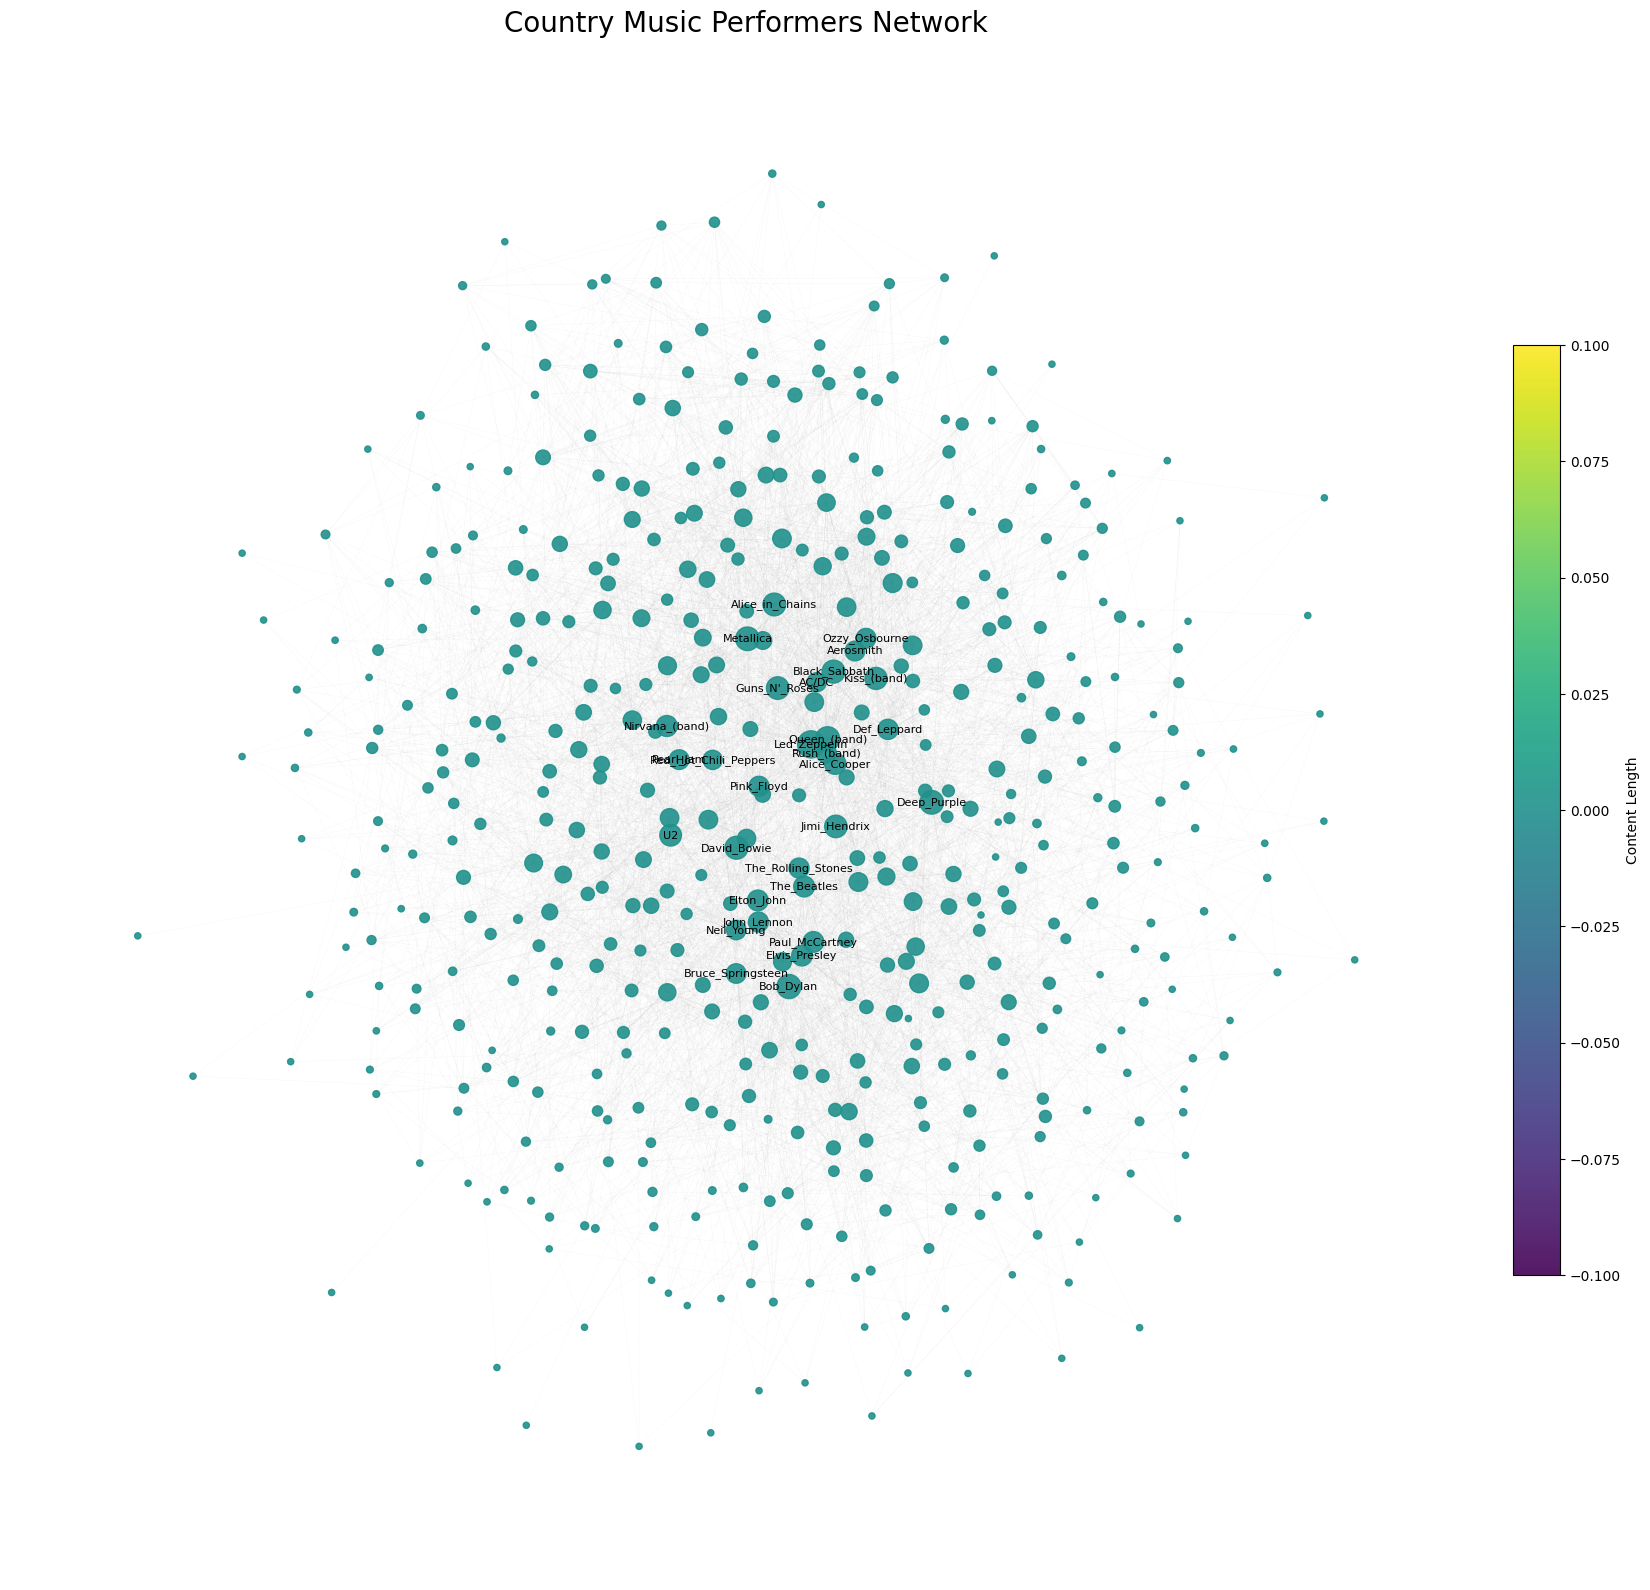

In [59]:
import networkx as nx
import matplotlib.pyplot as plt

# 1) Convert to undirected for visualization
G_undirected = graph.to_undirected()   

# 2) Layout 
pos = nx.kamada_kawai_layout(G_undirected)

# 3) Prepare node sizes (by degree)
deg_dict = dict(G_undirected.degree())
node_sizes = [max(20, d * 3) for d in deg_dict.values()]   # scale for visibility

# 4) Prepare node colors (by 'content_length' attribute, default 0 if missing)
content_lengths = [
    G_undirected.nodes[n].get("content_length", 0) for n in G_undirected.nodes()
]
vmin = min(content_lengths)
vmax = max(content_lengths)

# 5) Plot
fig, ax = plt.subplots(figsize=(20, 20))

nx.draw_networkx_edges(
    G_undirected, pos, ax=ax, width=0.2, alpha=0.12, edge_color="#999999"
)


nodes_artist = nx.draw_networkx_nodes(
    G_undirected, pos, ax=ax,
    node_size=node_sizes,
    node_color=content_lengths,
    cmap="viridis",
    vmin=vmin, vmax=vmax,
    alpha=0.9,
)

cbar = fig.colorbar(nodes_artist, ax=ax, fraction=0.03, pad=0.02)
cbar.set_label("Content Length")

# 6) Label the top-k hubs by degree 
k = 30
top_k = sorted(deg_dict.items(), key=lambda x: x[1], reverse=True)[:k]
labels = {n: n for n, _ in top_k}
nx.draw_networkx_labels(G_undirected, pos, labels=labels, font_size=8, ax=ax)

ax.set_title("Country Music Performers Network", fontsize=20)
ax.set_axis_off()
plt.show()


### Visualization of the Performer Network

The visualization of the performer network provides a clear picture of its structure:

- **Node size** is proportional to degree (number of connections). Larger nodes represent highly connected artists.  
- **Node color** corresponds to the length of the artist’s Wikipedia page (content length), with brighter colors indicating longer entries.  
- **Edges** represent links (references/collaborations), and the Kamada-Kawai layout places highly connected performers toward the center.  

From the figure, we observe that only a **few artists (e.g., The Beatles, Bob Dylan, Queen, Metallica)** emerge as large central hubs with many connections. Most other nodes are smaller and positioned at the periphery with fewer links.  

This is consistent with a **scale-free network** structure, where a small number of performers dominate in terms of connections, while the majority remain relatively obscure.